# MNIST MLP Demonstration

This project deals with the classification of handwritten digits. MLPs (Multilayer Perceptrons) are trained to predict digits in the MNIST dataset. Especially the dropout technuque is demonstrated to reduce overfitting.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [31]:
#split the data into the training and testing dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


The training dataset contains 60,000 images, while the testing dataset contains 10,000 images.

### Draw the first 10 numbers

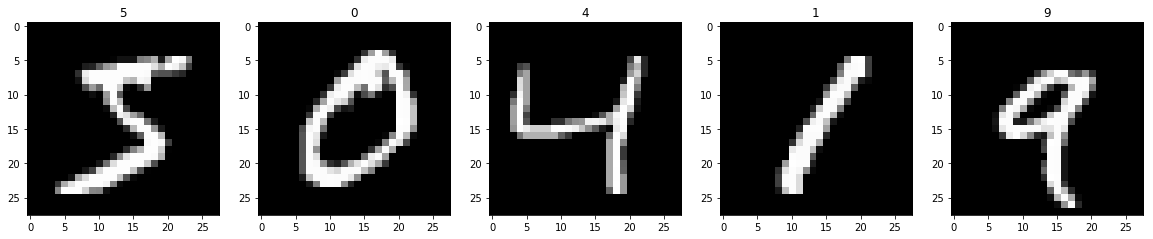

In [33]:
fig = plt.figure(figsize=(20,20))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(y_train[i])

### One hot encodig

In [34]:
#In the original dataset numbers are classified using the numbers 0-9
y_train[0]

5

In [35]:
#one hot encode training and testing categories
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [36]:
#The encoded dataset contains a vector with 10 binary entries. The location were the entry is "activated" 
#corresponds to the original number.
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Simple MLP Model

The following model uses an input layer, 2 hidden layers with 100 neurons respectively and an output layer with 10 nodes. The hidden layers use ReLUs as activation functions, while the output layer uses softmax in order to predict probabilities of being in each number category.

In [64]:
from keras.models import Sequential
from keras.layers import Flatten, Dropout, Dense

model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_29 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
             metrics=['accuracy'])

### Display the accuracy with random weights

In [66]:
metrics = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(metrics)

10000/10000 [==============================] - 1s 93us/step
['loss', 'acc']
[14.391624537658691, 0.0858]


As expected the prediction accuracy is very low with initialized random weights.

In [67]:
from keras.callbacks import ModelCheckpoint
   
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 63us/step - loss: 5.9445 - acc: 0.6203 - val_loss: 5.0049 - val_acc: 0.6813

Epoch 00001: val_loss improved from inf to 5.00493, saving model to mnist.model.best.hdf5
Epoch 2/20
48000/48000 [==============================] - 3s 54us/step - loss: 4.5226 - acc: 0.7137 - val_loss: 4.4173 - val_acc: 0.7218

Epoch 00002: val_loss improved from 5.00493 to 4.41733, saving model to mnist.model.best.hdf5
Epoch 3/20
48000/48000 [==============================] - 3s 56us/step - loss: 4.3598 - acc: 0.7253 - val_loss: 4.2807 - val_acc: 0.7308

Epoch 00003: val_loss improved from 4.41733 to 4.28069, saving model to mnist.model.best.hdf5
Epoch 4/20
48000/48000 [==============================] - 3s 55us/step - loss: 4.2433 - acc: 0.7337 - val_loss: 4.1534 - val_acc: 0.7398

Epoch 00004: val_loss improved from 4.28069 to 4.15340, saving model to mnist.model.best.hdf5
Epoch 5/20
48000/48000 [==

In [68]:
model.load_weights('mnist.model.best.hdf5')

In [69]:
metrics = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(metrics)

10000/10000 [==============================] - 1s 56us/step
['loss', 'acc']
[3.878389277267456, 0.7581]


After training the accuracy increases dramatically (around 76%)

## Simple MLP Model with dropout technique

The following model adds two additional layer after each hidden layer. These dropout layers help reduce overfitting using a dropout rate of 20%.

In [70]:
from keras.models import Sequential
from keras.layers import Flatten, Dropout, Dense

model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
             metrics=['accuracy'])

In [72]:
from keras.callbacks import ModelCheckpoint
   
checkpointer = ModelCheckpoint(filepath='mnist_dropout.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 74us/step - loss: 6.6367 - acc: 0.5749 - val_loss: 3.6281 - val_acc: 0.7665

Epoch 00001: val_loss improved from inf to 3.62812, saving model to mnist_dropout.model.best.hdf5
Epoch 2/20
48000/48000 [==============================] - 3s 63us/step - loss: 3.6793 - acc: 0.7623 - val_loss: 2.8415 - val_acc: 0.8182

Epoch 00002: val_loss improved from 3.62812 to 2.84152, saving model to mnist_dropout.model.best.hdf5
Epoch 3/20
48000/48000 [==============================] - 3s 60us/step - loss: 2.6781 - acc: 0.8264 - val_loss: 1.3859 - val_acc: 0.9088

Epoch 00003: val_loss improved from 2.84152 to 1.38591, saving model to mnist_dropout.model.best.hdf5
Epoch 4/20
48000/48000 [==============================] - 3s 61us/step - loss: 2.0101 - acc: 0.8685 - val_loss: 1.4495 - val_acc: 0.9057

Epoch 00004: val_loss did not improve from 1.38591
Epoch 5/20
48000/48000 [=====================

In [73]:
model.load_weights('mnist_dropout.model.best.hdf5')

In [74]:
metrics = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(metrics)

10000/10000 [==============================] - 1s 55us/step
['loss', 'acc']
[0.8326474254135557, 0.9474]


This model generalizes a lot better and thus produces an accuracy of around 95%.

## Final Remarks

While the model using the dropout technique performs better in the current iteration, this behaviour is not always observable. In 2 out of 4 iterations the simple model performed actually better (although the performance was only only slightly better by 2-3%). The model using a dropout rate on the other hand seems to perform extremely stable producing a constant accuracy of approximately 95%.